# Lab 5 - Exploratory Data Analysis

| Member Name                         | Student ID           |
|----------------------------------------|-----------------------|
|Kanyaluck    Chimchome            |    64070501003   |
|Boonyarit     Samran                 |    64070501028   |  	
|Warisara      Patib                     |   64070501044    |  	
|Chanidapa   Chanama                |  64070501090    |	
|Nontawat      Kunlayawuttipong  |  64070501093   	|

**instruction** : Use `covertype` dataset, plot an appropriate visualization to answer following questions:

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# importing dataset
cvt = pd.read_csv("data/covertype.csv")
cvt.info() # viewing dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581012 entries, 0 to 581011
Data columns (total 17 columns):
 #   Column                              Non-Null Count   Dtype 
---  ------                              --------------   ----- 
 0   index                               581012 non-null  int64 
 1   elevation                           581012 non-null  int64 
 2   aspect                              581012 non-null  int64 
 3   slope                               581012 non-null  int64 
 4   horizontal_distance_to_hydrology    581012 non-null  int64 
 5   vertical_distance_to_hydrology      581012 non-null  int64 
 6   horizontal_distance_to_roadways     581012 non-null  int64 
 7   hillshade_9am                       581012 non-null  int64 
 8   hillshade_noon                      581012 non-null  int64 
 9   hillshade_3pm                       581012 non-null  int64 
 10  horizontal_distance_to_fire_points  581012 non-null  int64 
 11  wilderness_type                     581

In [4]:
# looking into sample of dataset
cvt.head()

index  elevation  aspect  slope  horizontal_distance_to_hydrology  \
0      0       2596      51      3                               258   
1      1       2590      56      2                               212   
2      2       2804     139      9                               268   
3      3       2785     155     18                               242   
4      4       2595      45      2                               153   

   vertical_distance_to_hydrology  horizontal_distance_to_roadways  \
0                               0                              510   
1                              -6                              390   
2                              65                             3180   
3                             118                             3090   
4                              -1                              391   

   hillshade_9am  hillshade_noon  hillshade_3pm  \
0            221             232            148   
1            220             235            151   
2            234             238            135   
3            238             238            122   
4            220             234            150   

   horizontal_distance_to_fire_points wilderness_type  usfs_code  \
0                                6279           Rawah       7745   
1                                6225           Rawah       7745   
2                                6121           Rawah       4744   
3                                6211           Rawah       7746   
4                                6172           Rawah       7745   

                                      usfs_code_desc climatic_zone  \
0   Como - Legault families complex, extremely stony     subalpine   
1   Como - Legault families complex, extremely stony     subalpine   
2          Legault family - Rock land complex, stony       montane   
3  Como family - Rock land - Legault family compl...     subalpine   
4   Como - Legault families complex, extremely stony     subalpine   

             geologic_zone      cover_type  
0  igneous and metamorphic           Aspen  
1  igneous and metamorphic           Aspen  
2  igneous and metamorphic  Lodgepole Pine  
3  igneous and metamorphic  Lodgepole Pine  
4  igneous and metamorphic           Aspen

## 1. Distribution of cover_type across different wilderness_Type

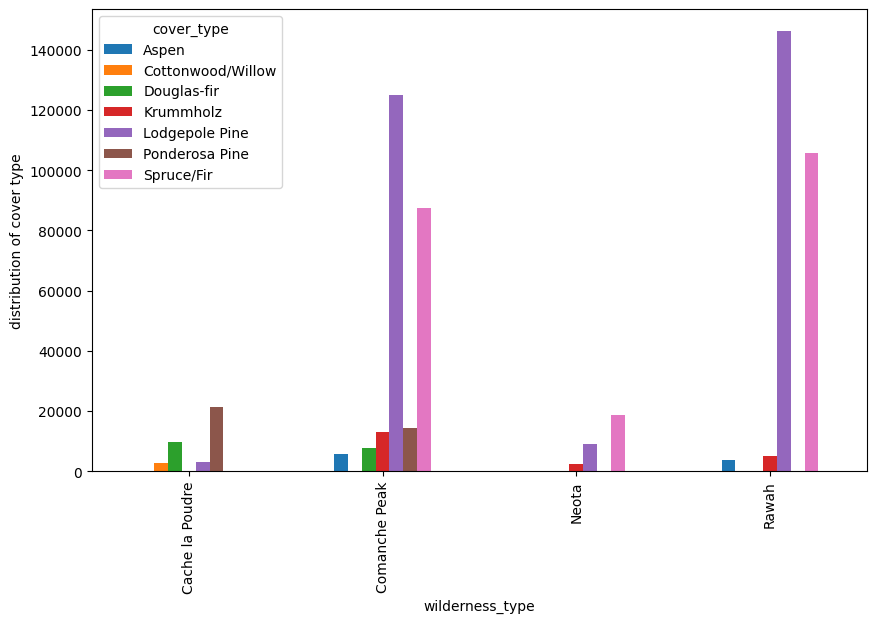

In [5]:
# count how many times of cover_types occured on different wilderness_type
# use pivot table function to create a new table that values in pivot table -> "number of count in each elevation"
plot1 = cvt.pivot_table(index = "wilderness_type", columns = "cover_type",
                        values = "elevation", aggfunc = "count")

# plotting by use bar graph which figsize width 10 and height 6
plot1.plot(kind = "bar", ylabel = "distribution of cover type", figsize = (10,6));

## 2. Distribution of elevation on each cover type

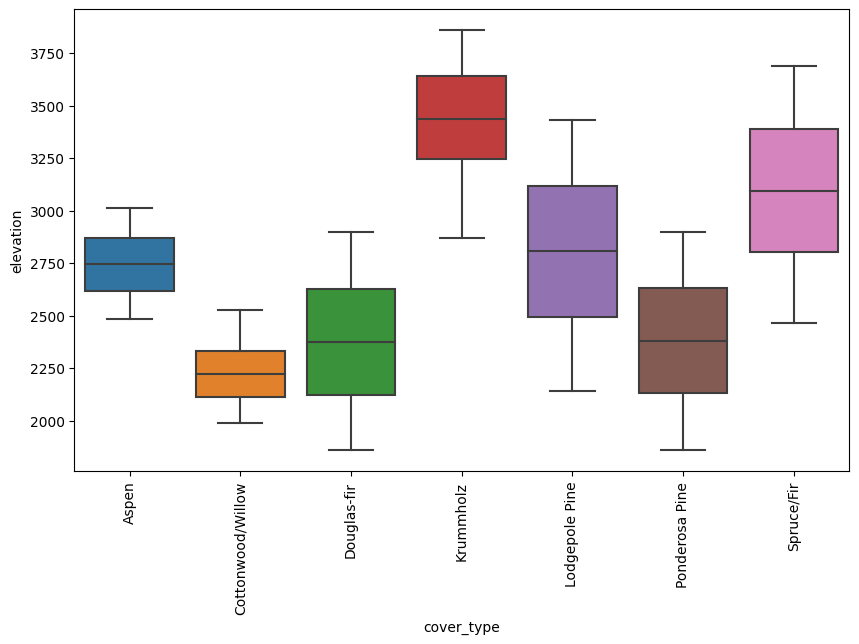

In [6]:
# count how many specific elevation occurs in any cover_type by using group by function
plot2 = cvt.groupby(['cover_type', 'elevation'])['elevation'].agg(count='count').reset_index()

# customizing plot which figsize width 10 and height 6
plt.figure(figsize=(10,6))
# plotting by use boxplot to see the distribution
sns.boxplot(x='cover_type', y='elevation',data=plot2)
# rotate "cover type" by 90 
plt.xticks(rotation=90);

## 3. Number of data points on each climatic zone

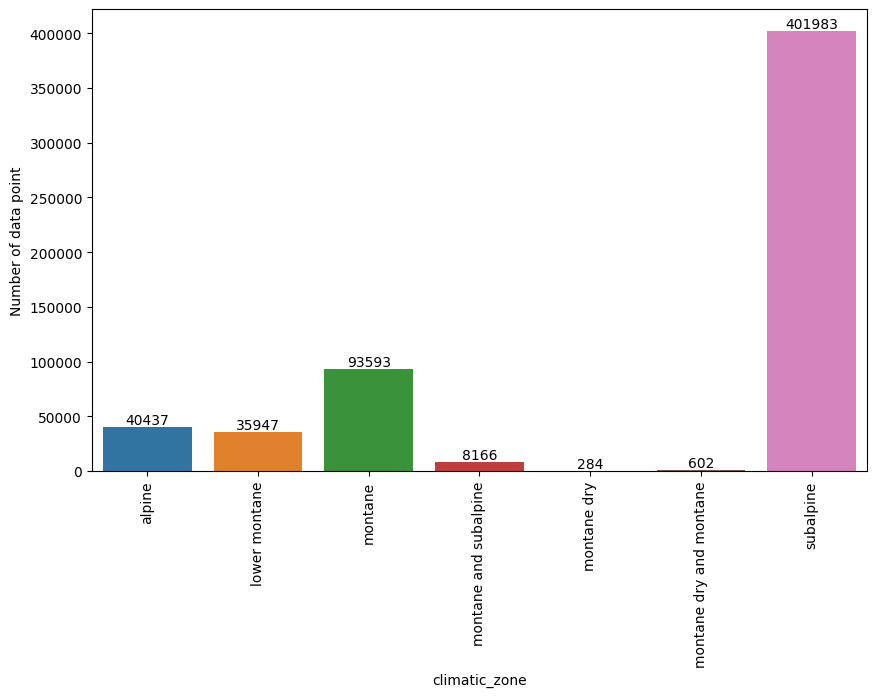

In [7]:
# count number of dataset classified with categories of climatic_zone
plot3 = cvt.groupby(['climatic_zone']).agg({'index':'count'}).reset_index()

# customizing plot which figsize width 10 and height 6
plt.figure(figsize=(10,6))
# use barplot to show number of data point on each climatic zone
ax = sns.barplot(x = 'climatic_zone', y = 'index', data =plot3, errwidth = 0)
# add bar label in each bar plot
ax.bar_label(ax.containers[0])
# add label at y-axis -> "Number of data point"
plt.ylabel('Number of data point')
# rotate "cover type" by 90 
plt.xticks(rotation=90);

## 4. Which cover type dominated subalpine climate

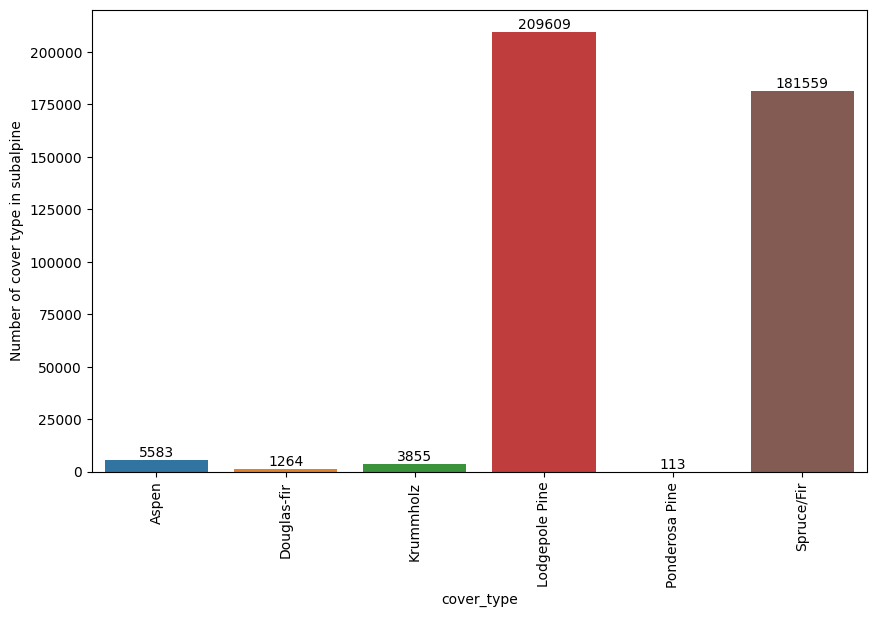

In [8]:
# count number of cover type in subalpine climate
plot4 = cvt[cvt["climatic_zone"] == "subalpine"].groupby(by = ['cover_type']).agg({'index':'count'}).reset_index()

# customizing plot which figsize width 10 and height 6
plt.figure(figsize=(10,6))
# use barplot to show number of cover type in subalpine
ax = sns.barplot(x = 'cover_type', y = 'index', data =plot4, errwidth = 0)
# add bar label in each bar plot
ax.bar_label(ax.containers[0])
# add label at y-axis -> "Number of data point"
plt.ylabel('Number of cover type in subalpine')
# rotate "cover type" by 90 
plt.xticks(rotation=90);

**Answer & Explanation** : In subalpine climate, Lodgepole Pine is the dominance because it has highest number of cover type in subalpine.

## 5. Which cover types has a tendency to be found near bodies of water

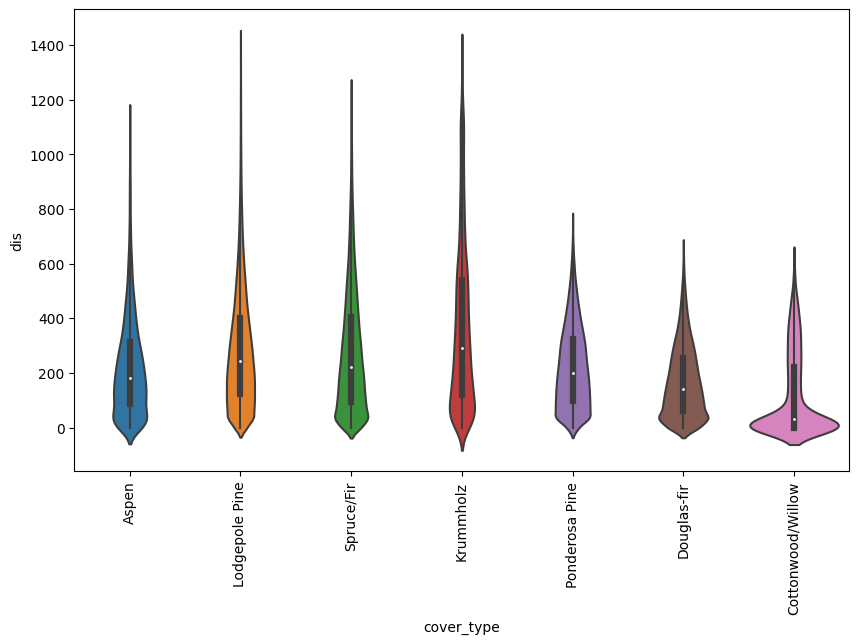

In [9]:
# use "horizontal_distance_to_hydrology","vertical_distance_to_hydrology" attributes to find the distance
plot5 = cvt.loc[:,["horizontal_distance_to_hydrology","vertical_distance_to_hydrology","cover_type"]]
# use np.hyplot as function to find the distance -> sqrt(x1**2 + x2**2)
plot5["dis"] =  np.hypot(plot5['horizontal_distance_to_hydrology'],
                         plot5['vertical_distance_to_hydrology']) 

# customizing plot
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
# use violinplot to show the distribution of distance in each cover types clearly
sns.violinplot(data=plot5, x = 'cover_type', y = 'dis') ;

**Answer & Explanation** : From this graph you can see that the pink one (Cottonwood/Willow) mean is the nearest value to 0. And because wide of each graph is show the distribution that's mean most of Cottonwood/Willow have tendency to be found near body. So we can sort by the cover type that that can be found near bodies of water from near to far like this, 
> Cotton wood/Willow -> Douglas-fir -> Aspen ~ Ponderosa Pine  -> Spruce/Fir -> Lodgepole Pine -> Krummholz  

## 6. Which cover types has a tendency to be found on shady area from 9am to noon

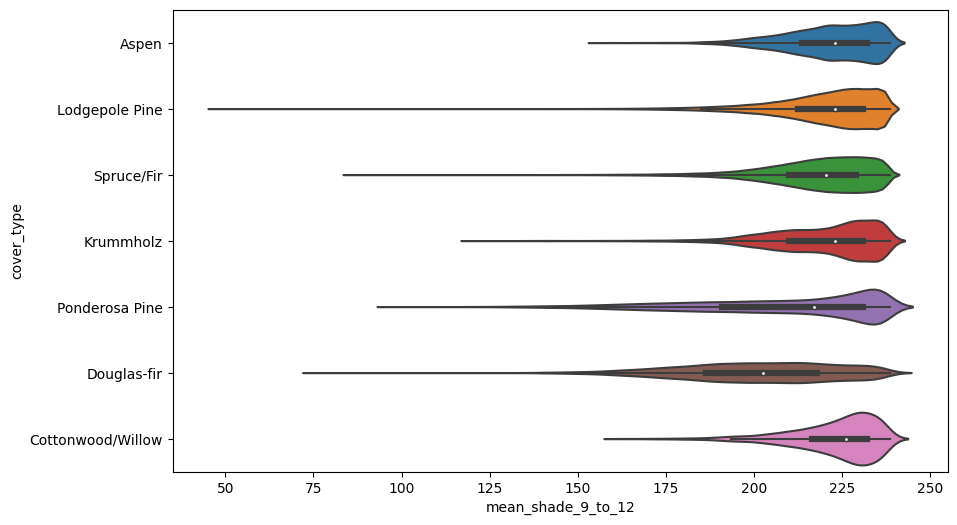

In [10]:
# using the data in the attribute "hillshade_9am","hillshade_noon","cover_type"
plot6 = cvt.loc[:,["hillshade_9am","hillshade_noon","cover_type"]]
# find the mean betweem "hillshade_9am" and "hillshade_noon" in each row
plot6["mean_shade_9_to_12"] = plot6[["hillshade_9am","hillshade_noon"]].mean(axis = 1) 

# customizing plot
plt.figure(figsize=(10,6))
# use the violin plot to show the distribution of data after finding the mean
sns.violinplot(data=plot6, y = 'cover_type', x = 'mean_shade_9_to_12');

**Answer & Explanation** : From the graph we can see that most of cover type have the mean of data nearly to each other. Only the brown one (Douglas-fir) that have the mean of distribution less than other that means it is more shady. But the orange (Lodgepole) data is more distributed and it value is near to 0 more than Douglas-fir. So although Lodgepole has a tendency to be found in more shady area but it only in some case. We can conclue that Douglas-fir is the most shady area from 9 am to noon.

## 7. Which cover types has a tendency to be found away from hazardous points(roadways/firepoints)

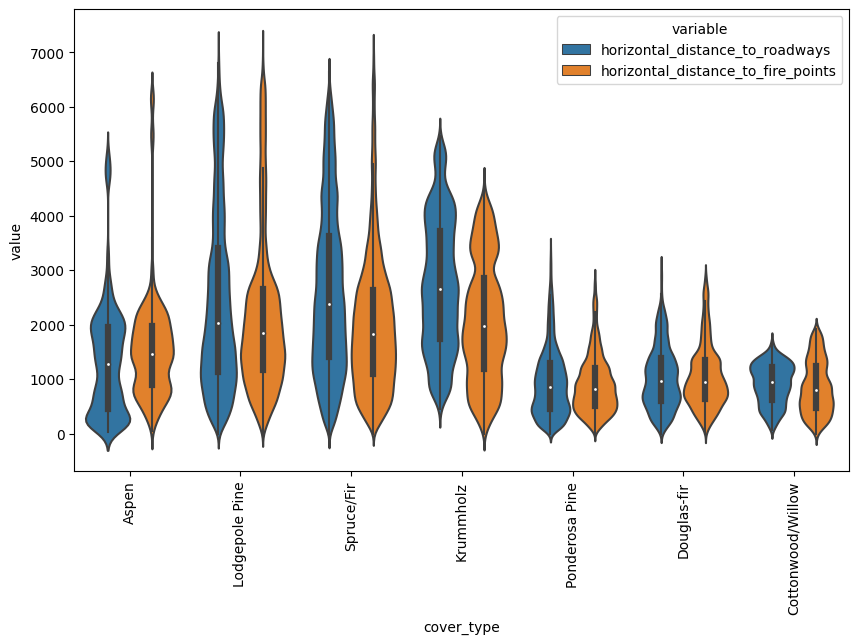

In [11]:
# get only column horizontal_distance_to_roadways, horizontal_distance_to_fire_points, cover_type
plot7 = cvt[["horizontal_distance_to_roadways","horizontal_distance_to_fire_points","cover_type"]]
plot7 = plot7.melt(id_vars = "cover_type",
                   value_vars = ["horizontal_distance_to_roadways","horizontal_distance_to_fire_points"])

# customizing plot
plt.figure(figsize=(10,6))
plt.xticks(rotation=90)
sns.violinplot(data=plot7, x = 'cover_type', y = "value", hue = "variable") ;

**Answer & Explanation** : the graph show tendency of cover_type to be found away from hazardous points(road way, fire point) so from this graph cover_type Krummholz has the most tendency to be found away from hazardous points.

## 8. Determine whether elevation provides more information to distinguish Krummholz from Cottonwood/Willow than horizontal_distance_to_hydrology

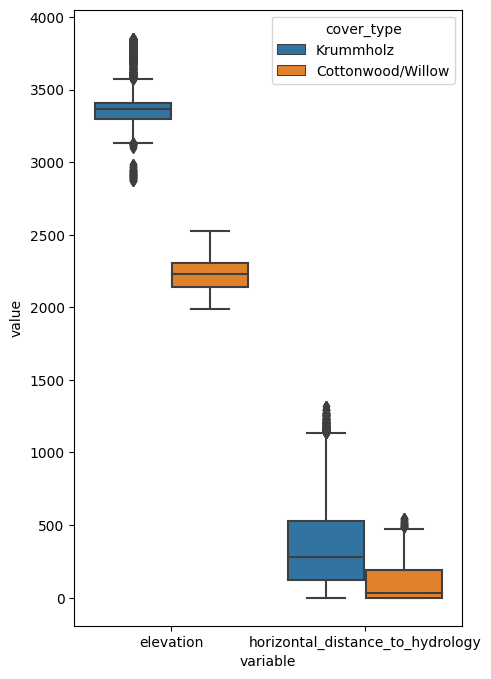

In [12]:
# get only column cover_type, elevation, horizontal_distance_to_hydrology
plot8 = cvt[["cover_type","elevation","horizontal_distance_to_hydrology"]]
# get only cover_type Krummholz or Cottonwood/Willow
plot8 = plot8[plot8["cover_type"].isin(["Krummholz","Cottonwood/Willow"])]
plot8 = plot8.melt(id_vars = "cover_type",
                   value_vars = ["elevation","horizontal_distance_to_hydrology"])

# customizing plot
plt.figure(figsize=(5,8))
sns.boxplot(data = plot8, x = "variable", y = 'value', hue = "cover_type");

**Explanation** :  The value in elevation is different more than the value of horizontal_distance_to_hydrology for Krummholz and Cottonwood/Willow so elevation distinguishes between Krummholz and Cottonwood/Willow more than horizontal_distance_to_hydrology.

## 9. Compare the relationship between Krummholz and Cottonwood/Willow togeographical features (elevation, distance to hydrology, hillshade, etc.).

In [13]:
# preprocessing data
# filter cover_type : Krummholz or Cottonwood/Willow
df = cvt[cvt["cover_type"].isin(["Krummholz","Cottonwood/Willow"])]
number_df = df.drop(["index","wilderness_type","usfs_code",
                     "usfs_code_desc","climatic_zone","geologic_zone"], axis =1)
category_df = df[["wilderness_type","usfs_code","climatic_zone","geologic_zone",
                     "cover_type"]]

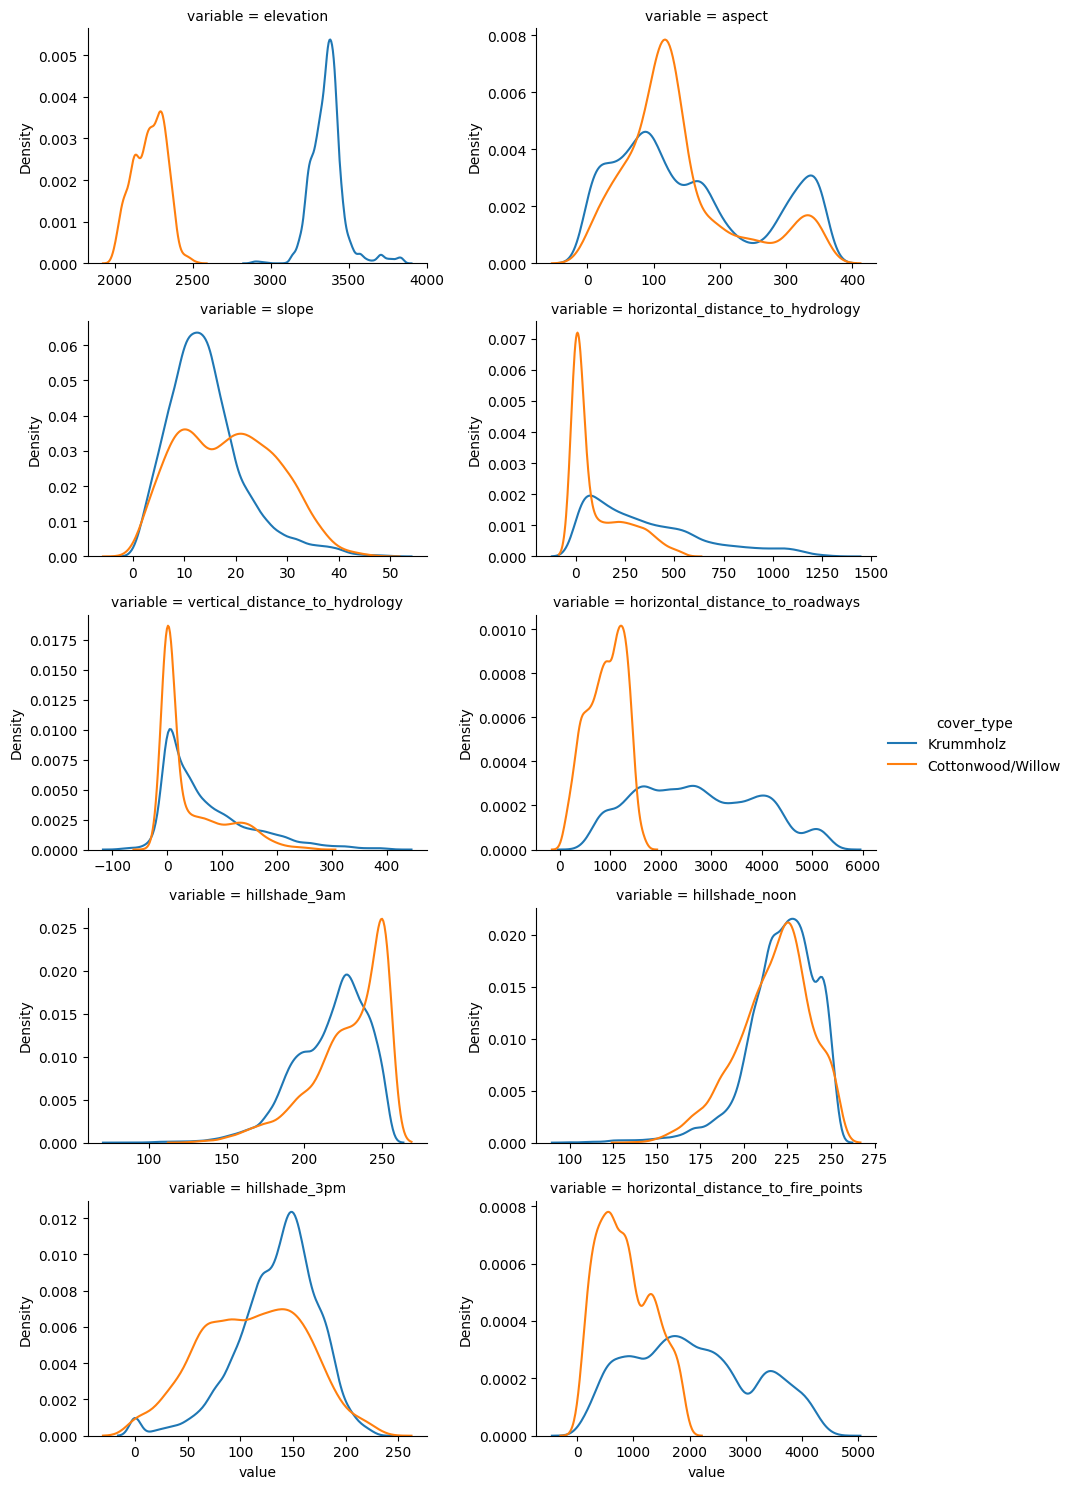

In [14]:
# compare relationship of numerical variables 
numberp_df = pd.melt(number_df, "cover_type")
plot9_1 = sns.FacetGrid(numberp_df, col = "variable", hue = "cover_type",
                        sharex=False, sharey=False, col_wrap = 2, aspect = 1.5)
plot9_1.fig.subplots_adjust(top=.5)
plot9_1.map(sns.kdeplot, "value")
plot9_1.add_legend();

**Explanation** : Relationship between Krummholz or Cottonwood/Willow 
- Elevation are at difference range.
- They are able to divide the normally aspect into 2 range which are about 0 to 250 that aspect of Cottonwood/Willow mostly less than Krummholz, and from about 250 to 400 that aspect of Cottonwood/Willow mostly greater than Krummholz.
- Consider slope, Krummholz mostly flat (all about 10) more than Cottonwood/Willow (about 10 to 40).
- Consider horizontal distance to hydrology, Cottonwood/Willow mostly near while Krummholz much more various.
- Consider vertical distance to hydrology, Cottonwood/Willow mostly near while Krummholz much more various. (likely horizontal distance to hydrology)
- Consider horizontal distance to roadway, Cottonwood/Willow mostly near (0-2,000) more than Krummholz much more various (0-6000). 
- Hill shade (alltime) are often alike to each other especially at noon. 
- Consider horizontal distance to fire points, Cottonwood/Willow mostly near (0-2,000) more than Krummholz much more various (0-5000). (resemble to roadway)

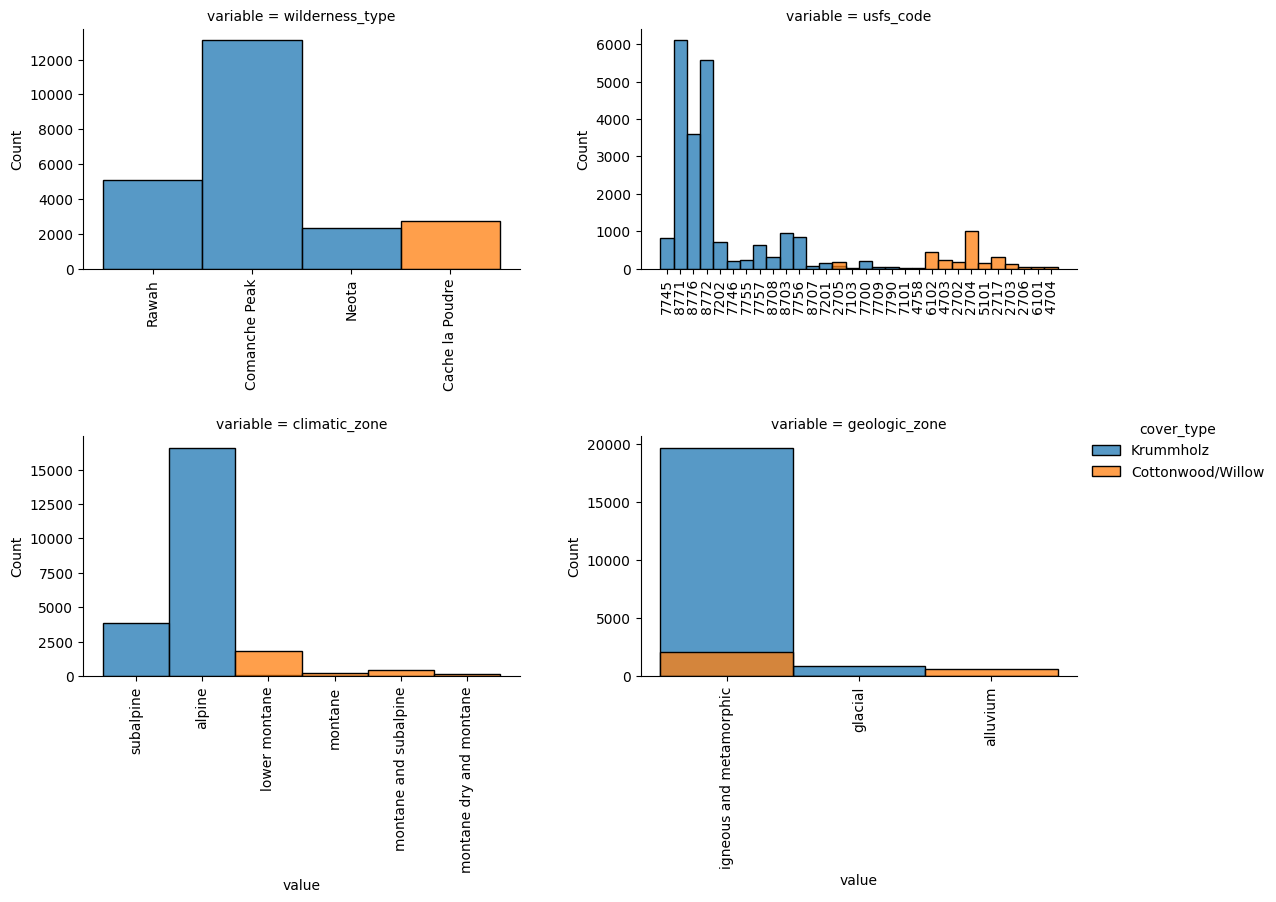

In [15]:
# compare relationship of categorical variables 
category_df = category_df.astype("str")
categoryp_df = pd.melt(category_df, "cover_type")
plot9_2 = sns.FacetGrid(categoryp_df, col = "variable", hue = "cover_type",
                        sharex=False, sharey=False, height = 3.7, aspect = 1.5, col_wrap = 2)
plot9_2.map(sns.histplot, "value")
plot9_2.set_xticklabels(rotation=90)
plt.subplots_adjust(hspace=0.7)
plot9_2.add_legend();

**Explanation** : Relationship between Krummholz or Cottonwood/Willow
- (wilderness_type) Krummholz is in Rawah, Commanche Park and Neota while Cottonwood/Willow is in Cache la poudre.
- (usfs_code) mostly difference code.
- (climate zone) Krummholz is in Subalpine and Alpine, Cottonwood/Willow is in lower montane, motane, motane & Subalpine, and motane dry & montane.
- (geologic_zone) Krummholz is in igneous and metamorphic and glacial, Cottonwood/Willow is in igneous and metamorphic and alluvium.

## 10. Plot histogram of elevation, aspect, and slope. Discuss about the shape of the distribution.

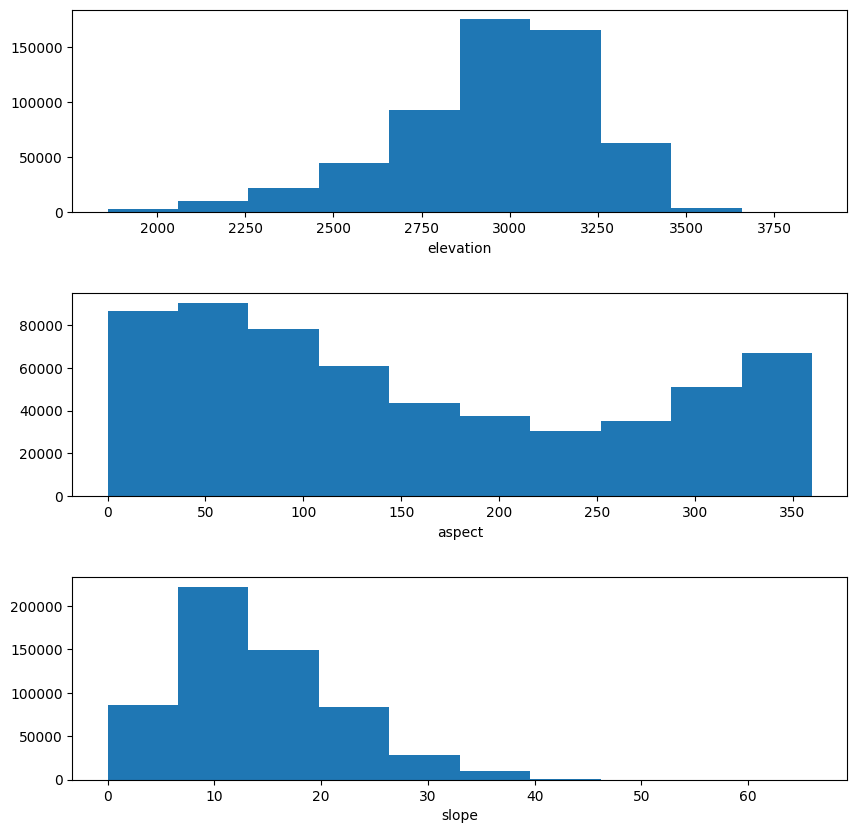

In [16]:
#
fig, ax = plt.subplots(nrows = 3, ncols = 1, figsize = (10,10))

# customizing plot 
plt.subplots_adjust(hspace=0.4)
ax[0].hist(cvt["elevation"])
ax[0].set(xlabel = "elevation");
ax[1].hist(cvt["aspect"])
ax[1].set(xlabel = "aspect");
ax[2].hist(cvt["slope"])
ax[2].set(xlabel = "slope");

**Discussion & Explanation** : 
- Elevation histogram is negetive skew which mean mode is greater than median and mean, respectively.
- Aspect histogram is J-shaped which cannot summarize in statistic term.
- Slop histogram is positive skew which mean mode is less than median and mean, respectively.

## 11. For each member in your group, plot another useful visualization from this dataset.

### 11.1 The distribution of shady area at 9am, noon and 3pm of each cover type (1003)

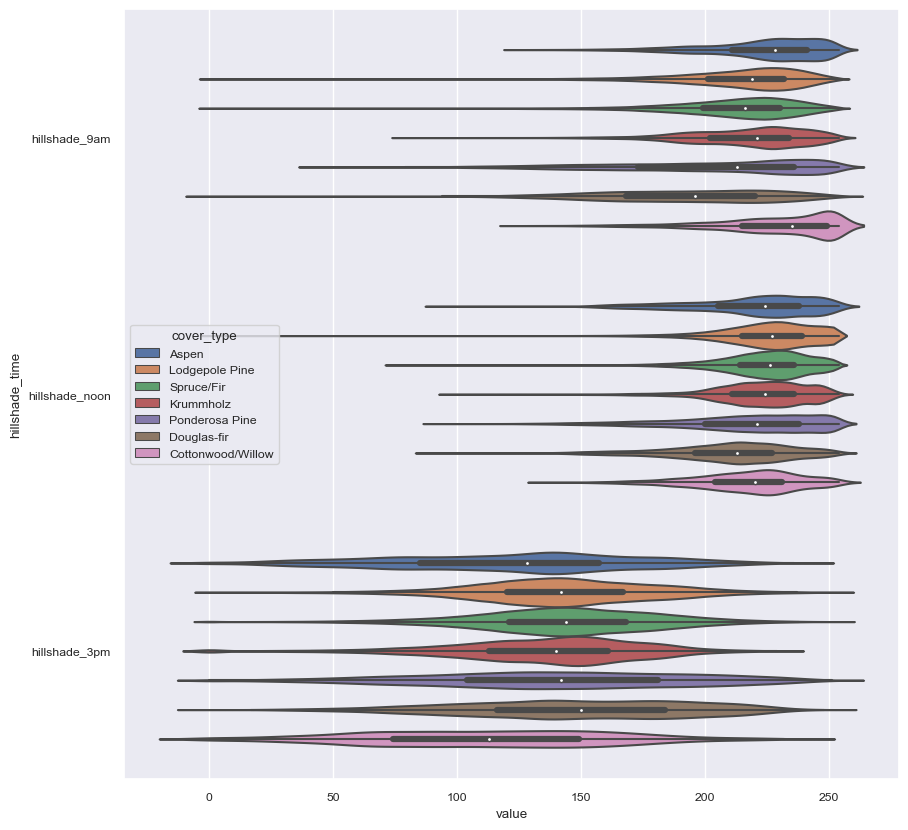

In [22]:
# using the data in the attribute "hillshade_9am","hillshade_noon","hillshade_3pm","cover_type"
hillshade = cvt.loc[:,["cover_type","hillshade_9am","hillshade_noon","hillshade_3pm"]]
# prepare data for ploting the graph by using melt fuction to gather shady all value in the same column 
hillshade = pd.melt(hillshade, id_vars=['cover_type'], value_vars=['hillshade_9am','hillshade_noon','hillshade_3pm'],
                    var_name='hillshade_time', value_name='value')

plt.figure(figsize=(10,10))
# use violin plot to show the distribution
sns.violinplot(data=hillshade, x="value", y="hillshade_time", hue='cover_type');

**Explanation** : From this graph you can see that the mean of the hill shade in every cover type at 3pm is less than 9am and noon. So this is means that 3pm in every cover type is more shady. And the distribution of hillshade at 3pm is mores evenly, thus it may be have other factor that caused this not like hillshade at 9am and noon that is more cluster.

### 11.2 mean of elevation, aspect ,and slope of every forest cover type (1028)

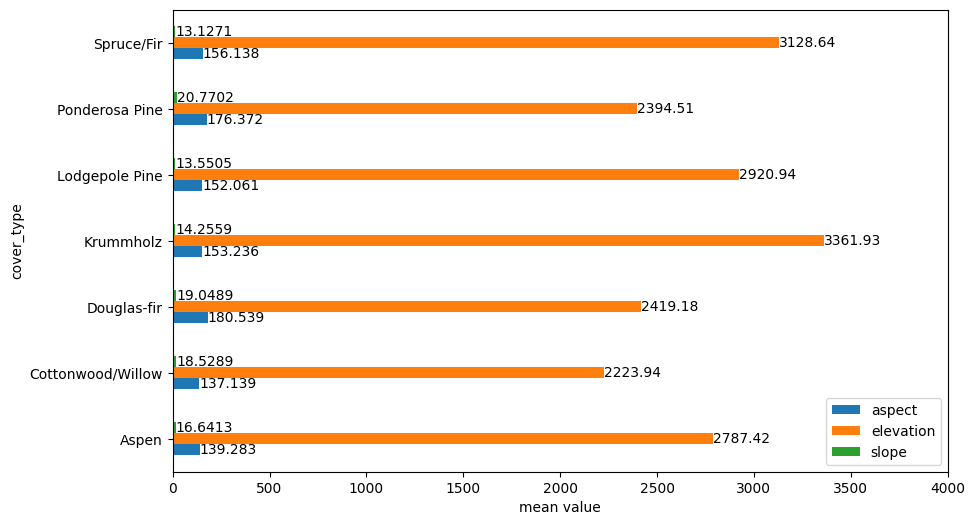

In [17]:
# do aggregate function on 3 variables : find average
pivot_df = cvt.pivot_table(index = "cover_type", values = ["elevation","aspect","slope"],
                                    aggfunc = np.mean)

# plotting & customizing bar graph of each variable
ax = pivot_df.plot.barh(legend = True, figsize = (10, 6))
ax.set(xlabel = "mean value")
ax.set_xlim(xmax = 4000)
ax.legend(loc = 4)

# show mean value at the end of bar plot(s).
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2]);

### 11.3 Relationship between elevation(which have range 250 meters) and hillshade in each time (1044)

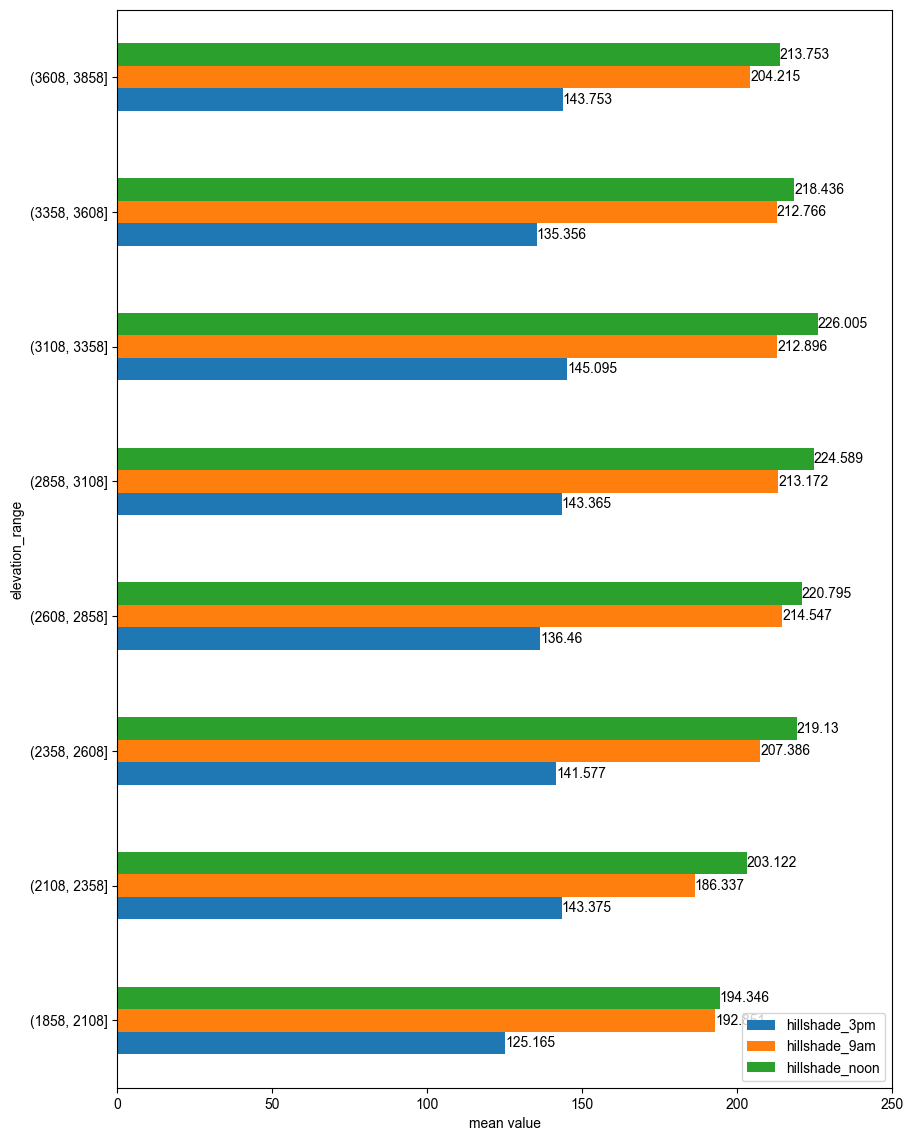

In [18]:
# find mean hillshade in each time in each elevation
plot1044 = cvt.pivot_table(index = "elevation",values = ["hillshade_9am","hillshade_noon","hillshade_3pm"],aggfunc=np.mean).reset_index()
# make a range of elevation = 250
plot1044["elevation_range"] = pd.cut(x=plot1044['elevation'], bins=np.arange(plot1044.elevation.min()-1,plot1044.elevation.max()+250, 250))
# group data by elevation_range
plot1044 = plot1044.groupby(['elevation_range']).mean().drop(columns='elevation').reset_index()

# plotting & customizing bar graph of each variable
ax = plot1044.plot.barh(x = 'elevation_range',figsize = (10, 14))
ax.set(xlabel = "mean value")
ax.set_xlim(xmax = 250)
# show mean value in each label
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.bar_label(ax.containers[2])
# change font size
sns.set(font_scale=0.8);

### 11.4 Relation between numeric value of Subalpine climate zone. (1090)

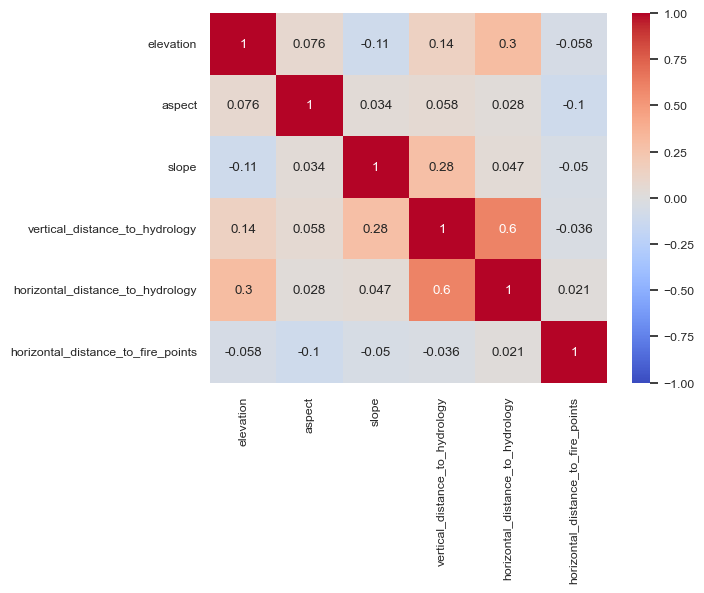

In [19]:
plot_1090 = cvt.loc[cvt['climatic_zone'] == 'subalpine', ['elevation', 'aspect', 'slope', 'vertical_distance_to_hydrology','horizontal_distance_to_hydrology','horizontal_distance_to_fire_points']]
sns.heatmap(plot_1090.corr(), vmin = -1.0, vmax = 1.0, annot=True, cmap = 'coolwarm');

**Explanation** : Most of variable have no relation. Only vertical_distance_to_hydrology and horizontal_distance_to_hydrology that have relation in the same way. Which can conclude that vertical_distance_to_hydrology maybe dependent on horizontal_distance_to_hydrology.

### 11.5 percent of each geologic_zone in Aspen. (1093)

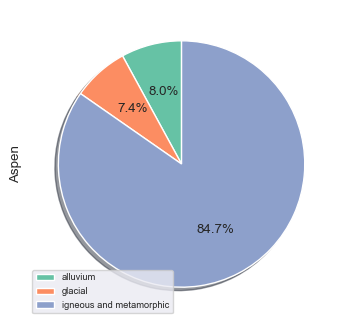

In [20]:
# get only column index, cover_type, geologic_zon
plt1093 = cvt[['index','cover_type', 'geologic_zone']]
# get only cover type named Aspen
plt1093 = cvt[cvt['cover_type'] == 'Aspen']
# count each geologic zone and make it to percent
plt1093 = pd.crosstab(index = plt1093['cover_type'], columns=plt1093['geologic_zone']).apply(lambda x: x/sum(x)*100, axis=1)
plt1093 = plt1093.T

# plotting
plt1093.plot(kind='pie',subplots = True, figsize=(4,4), autopct='%1.1f%%', labeldistance=None, shadow=True, colors=sns.color_palette('Set2'), startangle=90);
plt.legend(loc='lower left', fontsize='x-small');